In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/Used_Cars_Data.csv")
data.head()

,Brand,Model,Variant,Manufacturing_Year,Driven_Kilometer,Fuel,Number of Owner,Location,Price
0,Hyundai,i10,ERA 1.1 IRDE,2014,29383,Petrol,2,New Delhi,266199
1,Hyundai,i10,SPORTZ 1.2 KAPPA VTVT,2013,10558,Petrol,1,New Delhi,392199
2,Maruti,Swift,LXI,2020,10568,Petrol,1,New Delhi,592499
3,Maruti,Swift,LXI,2019,27659,Petrol,1,New Delhi,533399
4,KIA,SELTOS,HTX 1.5 PETROL MT,2020,32799,Petrol,1,New Delhi,1383099


In [3]:
data.shape

(5078, 9)

In [4]:
data.isnull().sum()

Brand                 0
Model                 0
Variant               0
Manufacturing_Year    0
Driven_Kilometer      0
Fuel                  0
Number of Owner       0
Location              0
Price                 0
dtype: int64

In [5]:
data.dtypes

Brand                 object
Model                 object
Variant               object
Manufacturing_Year     int64
Driven_Kilometer       int64
Fuel                  object
Number of Owner       object
Location              object
Price                  int64
dtype: object

Data Cleaning

In [6]:
data['Number of Owner'].value_counts()

1      3922
2      1063
3        91
4th       2
Name: Number of Owner, dtype: int64

In [7]:
data['Number of Owner']=data['Number of Owner'].replace('4th','4')

In [8]:
data['Number of Owner']=data['Number of Owner'].astype(float)

In [9]:
data['Number of Owner'].value_counts()

1.0    3922
2.0    1063
3.0      91
4.0       2
Name: Number of Owner, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078 entries, 0 to 5077
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5078 non-null   object 
 1   Model               5078 non-null   object 
 2   Variant             5078 non-null   object 
 3   Manufacturing_Year  5078 non-null   int64  
 4   Driven_Kilometer    5078 non-null   int64  
 5   Fuel                5078 non-null   object 
 6   Number of Owner     5078 non-null   float64
 7   Location            5078 non-null   object 
 8   Price               5078 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 357.2+ KB


Data Visalisation
                             Visualisation of categorical data

Number of Owner is flaot type but it is discrete value Manufacturing_Year is integer type but we can't consider as continuous data

so we consider both the columns as a nominal data

In [11]:
data_visualization_nominal=data[['Brand','Model','Variant','Manufacturing_Year','Fuel','Location','Number of Owner']].copy()

data_visualization_nominal.columns

Index(['Brand', 'Model', 'Variant', 'Manufacturing_Year', 'Fuel', 'Location',
       'Number of Owner'],
      dtype='object')

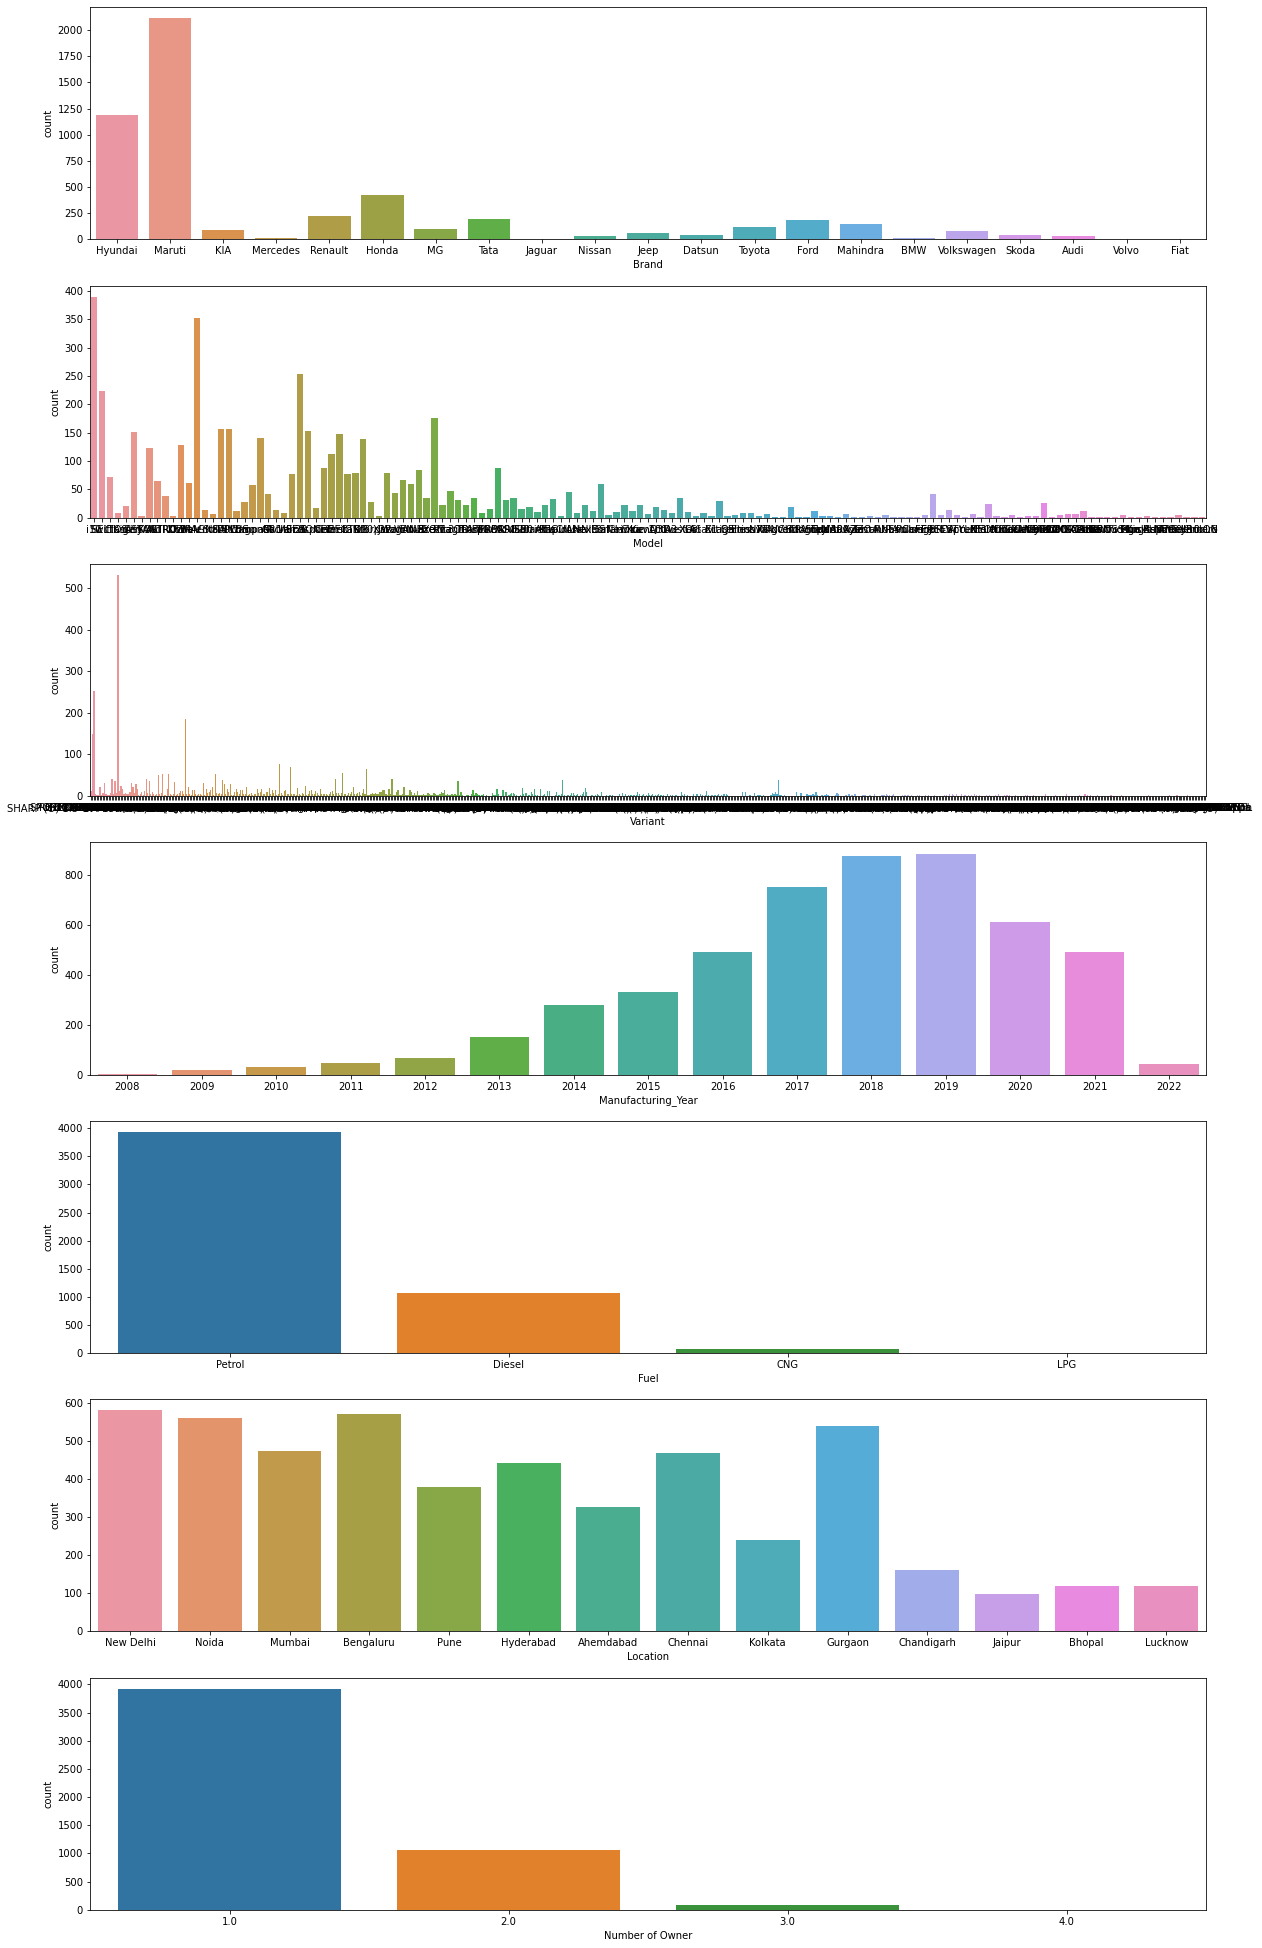

In [12]:
plt.figure(figsize=(20,35))
num =1

for column in data_visualization_nominal:
    if num <=7:
        ax = plt.subplot(7,1,num)
        sns.countplot(x=column,data=data_visualization_nominal)
        plt.xlabel(column,fontsize=10)
        
    num+=1
plt.show()  

In [13]:
data_visualisation_continuous=data[['Driven_Kilometer','Price']].copy()

data_visualisation_continuous.columns

Index(['Driven_Kilometer', 'Price'], dtype='object')

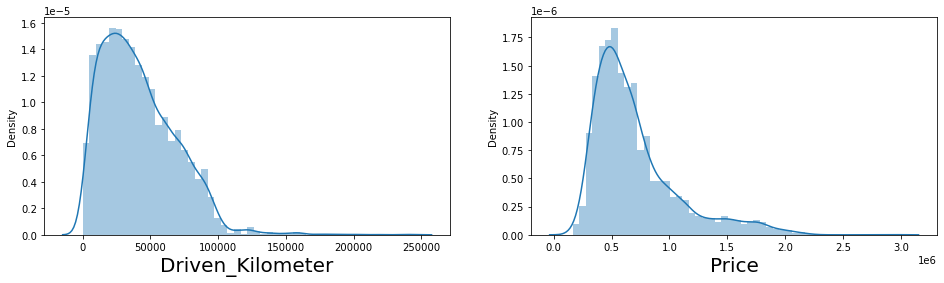

In [14]:
plt.figure(figsize=(16,4))
num =1

for column in data_visualisation_continuous:
    if num <=2:
        ax = plt.subplot(1,2,num)
        sns.distplot(data_visualisation_continuous[column])
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()   

In [15]:
enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [16]:
data.head()

,Brand,Model,Variant,Manufacturing_Year,Driven_Kilometer,Fuel,Number of Owner,Location,Price
0,6.0,138.0,283.0,2014,29383,3.0,2.0,11.0,266199
1,6.0,138.0,501.0,2013,10558,3.0,1.0,11.0,392199
2,12.0,109.0,379.0,2020,10568,3.0,1.0,11.0,592499
3,12.0,109.0,379.0,2019,27659,3.0,1.0,11.0,533399
4,9.0,99.0,347.0,2020,32799,3.0,1.0,11.0,1383099


Data Analysis

In [17]:
data.describe()

,Brand,Model,Variant,Manufacturing_Year,Driven_Kilometer,Fuel,Number of Owner,Location,Price
count,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5.078000e+03
mean,9.987790,69.961796,406.237495,2017.606341,41430.054943,2.534659,1.246357,6.885585,6.991051e+05
std,4.041766,45.330851,210.327846,2.423706,27380.534490,0.871201,0.473195,4.227305,3.662243e+05
min,0.000000,0.000000,0.000000,2008.000000,72.000000,0.000000,1.000000,0.000000,1.643990e+05
25%,6.000000,30.000000,230.000000,2016.000000,20104.750000,3.000000,1.000000,4.000000,4.485490e+05
50%,12.000000,65.000000,432.000000,2018.000000,36725.000000,3.000000,1.000000,6.000000,5.984990e+05
75%,12.000000,117.000000,584.000000,2019.000000,59040.750000,3.000000,1.000000,11.000000,8.224990e+05
max,20.000000,140.000000,744.000000,2022.000000,242597.000000,3.000000,4.000000,13.000000,2.952199e+06


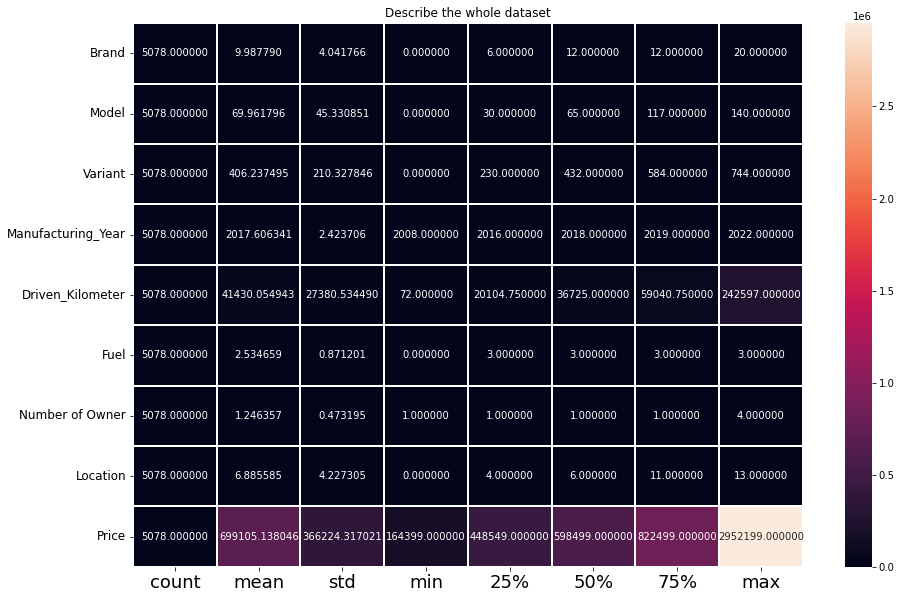

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

In [19]:
data.corr()

,Brand,Model,Variant,Manufacturing_Year,Driven_Kilometer,Fuel,Number of Owner,Location,Price
Brand,1.000000,-0.142697,0.227147,0.118702,-0.025650,-0.004019,-0.056821,0.015481,-0.042454
Model,-0.142697,1.000000,-0.006937,-0.121328,0.017157,0.059350,0.032871,-0.026428,-0.024655
Variant,0.227147,-0.006937,1.000000,-0.002993,-0.006394,0.026659,-0.035918,-0.019490,-0.121390
Manufacturing_Year,0.118702,-0.121328,-0.002993,1.000000,-0.530140,0.096899,-0.246368,-0.003974,0.398371
Driven_Kilometer,-0.025650,0.017157,-0.006394,-0.530140,1.000000,-0.353135,0.111600,-0.020686,-0.144403
Fuel,-0.004019,0.059350,0.026659,0.096899,-0.353135,1.000000,0.001023,-0.112707,-0.272635
Number of Owner,-0.056821,0.032871,-0.035918,-0.246368,0.111600,0.001023,1.000000,-0.064679,-0.123844
Location,0.015481,-0.026428,-0.019490,-0.003974,-0.020686,-0.112707,-0.064679,1.000000,0.058403
Price,-0.042454,-0.024655,-0.121390,0.398371,-0.144403,-0.272635,-0.123844,0.058403,1.000000


<AxesSubplot:>

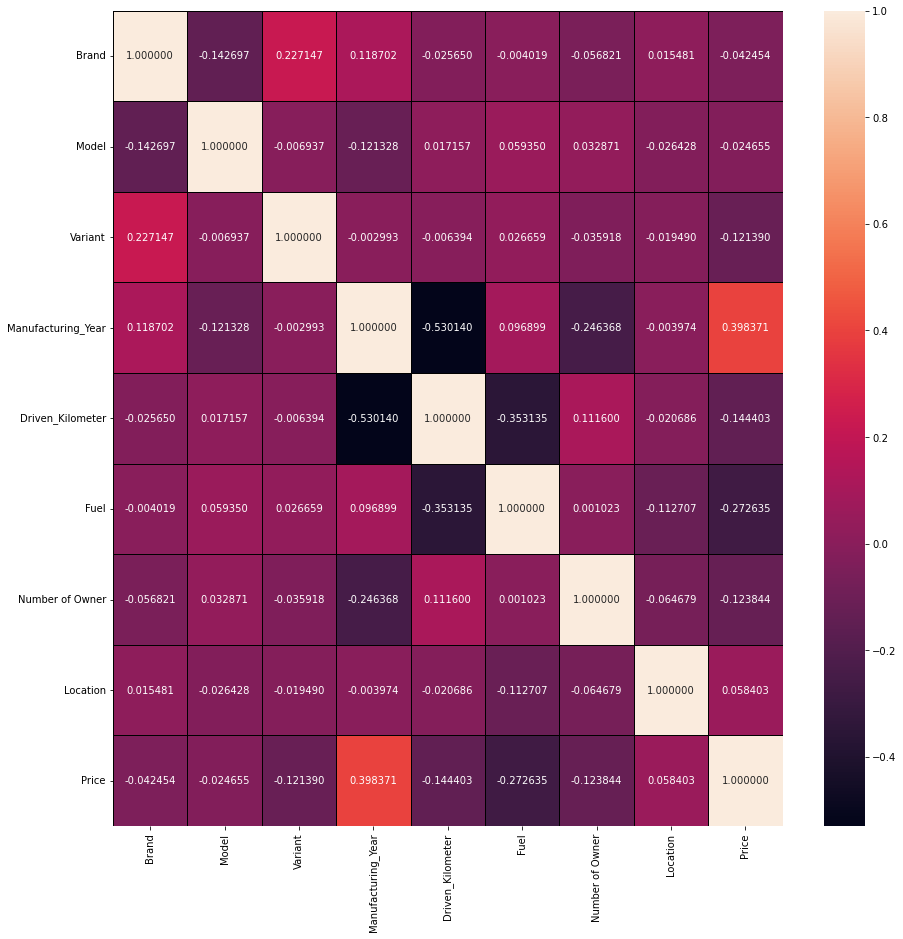

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='f')

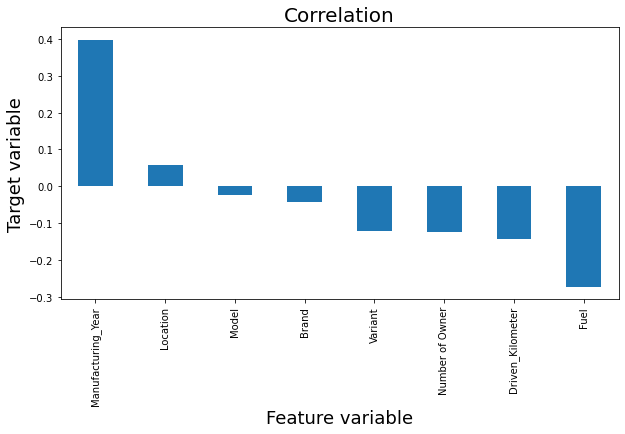

In [21]:
plt.figure(figsize=(10,5))
data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar')
plt.xlabel('Feature variable',fontsize=18)
plt.ylabel('Target variable',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

In [22]:
data.skew()

Brand                 0.030225
Model                 0.182556
Variant              -0.300468
Manufacturing_Year   -0.748359
Driven_Kilometer      1.063761
Fuel                 -1.399943
Number of Owner       1.727469
Location             -0.113658
Price                 1.544330
dtype: float64

In [23]:
x = data.drop(['Price'],axis=1)
y = data['Price']

z=np.abs(zscore(x))
threshold=3
print(np.where(z>3))

(array([  26,   28,   31,   46,   50,   58,   92,  122,  124,  355,  376,
        396,  451,  454,  474,  586,  588,  625,  639,  686,  699,  716,
        793,  813,  936,  970, 1016, 1037, 1039, 1095, 1230, 1283, 1291,
       1295, 1327, 1347, 1396, 1562, 1612, 1614, 1615, 1617, 1619, 1620,
       1627, 1628, 1634, 1638, 1662, 1664, 1666, 1685, 1715, 1723, 1735,
       1736, 1746, 1760, 1761, 1762, 1769, 1783, 1796, 1810, 1820, 1830,
       1881, 1895, 1961, 1964, 2007, 2084, 2102, 2148, 2150, 2151, 2152,
       2170, 2172, 2174, 2184, 2186, 2249, 2306, 2321, 2329, 2415, 2474,
       2521, 2546, 2554, 2565, 2566, 2572, 2575, 2583, 2599, 2612, 2614,
       2625, 2630, 2640, 2648, 2669, 2670, 2720, 2720, 2725, 2735, 2761,
       2817, 2933, 2971, 2974, 2979, 2980, 2986, 3032, 3101, 3119, 3257,
       3319, 3339, 3341, 3346, 3350, 3382, 3401, 3420, 3437, 3447, 3463,
       3508, 3531, 3568, 3664, 3688, 3690, 3788, 3789, 3794, 3838, 3858,
       3859, 3895, 3899, 4043, 4056, 4080, 4081, 4

In [24]:
data["Driven_Kilometer"]=np.sqrt(data["Driven_Kilometer"])

In [25]:
data.skew()

Brand                 0.030225
Model                 0.182556
Variant              -0.300468
Manufacturing_Year   -0.748359
Driven_Kilometer      0.077552
Fuel                 -1.399943
Number of Owner       1.727469
Location             -0.113658
Price                 1.544330
dtype: float64

In [26]:
data.head()

,Brand,Model,Variant,Manufacturing_Year,Driven_Kilometer,Fuel,Number of Owner,Location,Price
0,6.0,138.0,283.0,2014,171.414702,3.0,2.0,11.0,266199
1,6.0,138.0,501.0,2013,102.752129,3.0,1.0,11.0,392199
2,12.0,109.0,379.0,2020,102.800778,3.0,1.0,11.0,592499
3,12.0,109.0,379.0,2019,166.309952,3.0,1.0,11.0,533399
4,9.0,99.0,347.0,2020,181.104942,3.0,1.0,11.0,1383099


Model Fitting

In [27]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [28]:
lr=LinearRegression()

In [29]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 27.518252579185965
Testing accuracy score: 28.312255398064213


The model perform very well
random state 1
Training accuracy score: 28.71531611659437
Testing accuracy score: 23.080130916984874


The model perform very well
random state 2
Training accuracy score: 28.5943149279837
Testing accuracy score: 24.189232412565897


The model perform very well
random state 3
Training accuracy score: 27.256189030541535
Testing accuracy score: 29.01787852964214


The model perform very well
random state 4
Training accuracy score: 28.554777644313457
Testing accuracy score: 24.21208496424343


The model perform very well
random state 5
Training accuracy score: 27.536069392346107
Testing accuracy score: 28.424229181833695


The model perform very well
random state 6
Training accuracy score: 27.608587045344425
Testing accuracy score: 27.83172907737409


The model perform very well
random state 7
Training accuracy score: 26.86361594633

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [31]:
pred_test=lr.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score for testing",accuracy)

R square score for testing 27.903226807274095


In [32]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.18300822297313818


At cross fold 3 the cv score is 0.2465199643582664


At cross fold 4 the cv score is 0.24349588573968128


At cross fold 5 the cv score is 0.257250373895355


At cross fold 6 the cv score is 0.2540485044002572


At cross fold 7 the cv score is 0.24766963100044606


At cross fold 8 the cv score is 0.23927248608933632


At cross fold 9 the cv score is 0.24962283689616044




In [33]:
lrscore=cross_val_score(lr,x,y,cv=5)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 25.725037389535498


In [34]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 214364.34315141584
Mean square error: 86350410040.77792
Root mean square error: 293854.40279291023


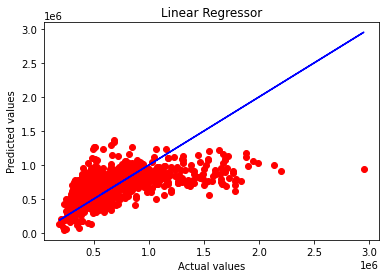

In [35]:
plt.figure(figsize=(6,4))
plt.scatter(y_test,pred_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regressor')                                                                                
plt.show()

In [36]:
dtr=DecisionTreeRegressor()

In [37]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: 74.1542393607482


random state 1
Training accuracy score: 100.0
Testing accuracy score: 68.31853069938717


random state 2
Training accuracy score: 100.0
Testing accuracy score: 76.46694043664375


random state 3
Training accuracy score: 100.0
Testing accuracy score: 71.88345306357056


random state 4
Training accuracy score: 100.0
Testing accuracy score: 78.34468854074619


random state 5
Training accuracy score: 100.0
Testing accuracy score: 75.19661364948934


random state 6
Training accuracy score: 100.0
Testing accuracy score: 73.60069913594975


random state 7
Training accuracy score: 100.0
Testing accuracy score: 73.21926145545855


random state 8
Training accuracy score: 100.0
Testing accuracy score: 71.90952456725374


random state 9
Training accuracy score: 100.0
Testing accuracy score: 66.46057357434535


random state 10
Training accuracy score: 100.0
Testing accuracy score: 68.20579827179981


random sta

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state =38)

In [39]:
pred_test=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_test)
print("R2 score:",dtrs*100)

R2 score: 94.7093816008286


In [40]:
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.481033728236417


At cross fold 3 the cv score is 0.5935663892917655


At cross fold 4 the cv score is 0.5527895661582373


At cross fold 5 the cv score is 0.5741181737747463


At cross fold 6 the cv score is 0.5966025120644244


At cross fold 7 the cv score is 0.6672691870777417


At cross fold 8 the cv score is 0.6494870507595693


At cross fold 9 the cv score is 0.645772694198273




In [41]:
dtrscore=cross_val_score(dtr,x,y,cv=7)
dtrc=dtrscore.mean()
print('cross val score:',dtrc*100)

cross val score: 67.3097212189892


In [42]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 19957.972440944883
Mean square error: 7193222658.612205
Root mean square error: 84812.86847296348


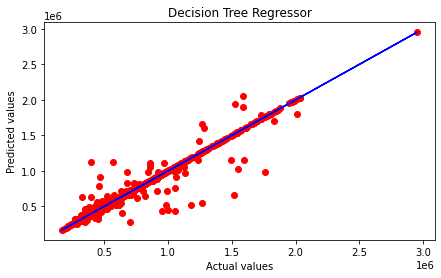

In [43]:
plt.figure(figsize=(7,4))
plt.scatter(y_test,pred_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Decision Tree Regressor')                                                                                
plt.show()

In [44]:
rfr=RandomForestRegressor()

In [45]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = i)
    rfr.fit(x_train,y_train)
    pred_train=rfr.predict(x_train)
    pred_test=rfr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 98.02898011127228
Testing accuracy score: 85.9922976476865


random state 1
Training accuracy score: 97.77791612603545
Testing accuracy score: 86.98695350192081


random state 2
Training accuracy score: 98.005221729016
Testing accuracy score: 84.22400380424135


random state 3
Training accuracy score: 97.83983492629761
Testing accuracy score: 86.54675171278427


random state 4
Training accuracy score: 97.85118354892518
Testing accuracy score: 85.33792922885166


random state 5
Training accuracy score: 97.74121748749249
Testing accuracy score: 88.34868652385374


random state 6
Training accuracy score: 97.85005398418029
Testing accuracy score: 86.87765825791978


random state 7
Training accuracy score: 97.85654804243228
Testing accuracy score: 86.73786496350306


random state 8
Training accuracy score: 98.03662706730381
Testing accuracy score: 87.9006357026157


random state 9
Training accuracy score: 97.83852760333451
Testing accuracy score: 81.1

In [47]:
preds_test=rfr.predict(x_test)
rfrs=r2_score(y_test,preds_test)
print("R2 score for testing:",rfrs*100)

R2 score for testing: 84.2258079994051


In [48]:
for j in range(2,10):
    cv_score=cross_val_score(rfr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.6933926265427555


At cross fold 3 the cv score is 0.7679613486609836


At cross fold 4 the cv score is 0.7503583688999242


At cross fold 5 the cv score is 0.7815479429816965


At cross fold 6 the cv score is 0.8019399757049633


At cross fold 7 the cv score is 0.8002052797119897


At cross fold 8 the cv score is 0.8126401262773728


At cross fold 9 the cv score is 0.8151738658857381




In [49]:
rfrscore=cross_val_score(rfr,x,y,cv=9)
rfrc=rfrscore.mean()
print('cross val score:',rfrc*100)

cross val score: 81.32745397048592


In [50]:
mae=mean_absolute_error(y_test,preds_test)
mse=mean_squared_error(y_test,preds_test)
rmse=np.sqrt(mean_squared_error(y_test,preds_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 72674.41074803149
Mean square error: 19442590188.16761
Root mean square error: 139436.68881670854


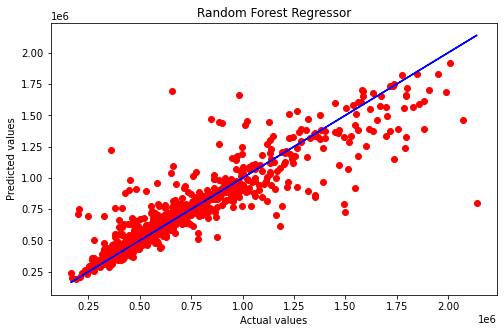

In [51]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regressor')                                                                                
plt.show()

In [52]:
gb= GradientBoostingRegressor()

In [53]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = i)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 82.8438599165959
Testing accuracy score: 79.84151267820012


random state 1
Training accuracy score: 81.62265403883339
Testing accuracy score: 80.28359759621424


random state 2
Training accuracy score: 81.29580534876261
Testing accuracy score: 75.03947292190358


random state 3
Training accuracy score: 81.65962993068739
Testing accuracy score: 78.61282818186575


random state 4
Training accuracy score: 81.7383921279074
Testing accuracy score: 79.00493870703365


random state 5
Training accuracy score: 81.80404428807934
Testing accuracy score: 81.70659509708499


random state 6
Training accuracy score: 82.69828381394827
Testing accuracy score: 78.19556240840294


random state 7
Training accuracy score: 82.39073072611991
Testing accuracy score: 78.80265754062307


random state 8
Training accuracy score: 80.22765138248417
Testing accuracy score: 79.1149186875056


random state 9
Training accuracy score: 83.17041857730524
Testing accuracy score: 74.

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 5)

In [55]:
pred_test=gb.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score",accuracy)

R square score 82.93149969165269


In [56]:
for j in range(2,10):
    cv_score=cross_val_score(gb,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.6198799401849453


At cross fold 3 the cv score is 0.7092960970240786


At cross fold 4 the cv score is 0.734163281032991


At cross fold 5 the cv score is 0.7455587614237928


At cross fold 6 the cv score is 0.7453960211105551


At cross fold 7 the cv score is 0.7456741803732478


At cross fold 8 the cv score is 0.7518153087542389


At cross fold 9 the cv score is 0.749938706067934




In [57]:
gbscore=cross_val_score(gb,x,y,cv=8)
gbc=gbscore.mean()
print('cross val score:',gbc*100)

cross val score: 75.1779684750984


In [58]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 98285.317331937
Mean square error: 21103765880.7166
Root mean square error: 145271.35258101166


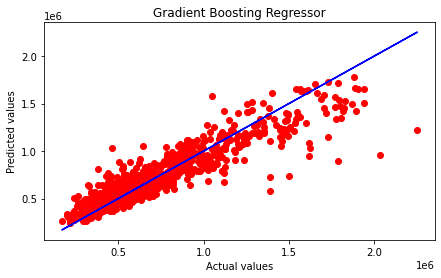

In [59]:
plt.figure(figsize=(7,4))
plt.scatter(y_test,pred_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Gradient Boosting Regressor')                                                                                
plt.show()

Random Forest Regression

In [60]:
Prediction=pd.DataFrame({"Actual_value":y_test,"Predicted_value":preds_test})
Prediction

,Actual_value,Predicted_value
4497,457499,426248.25
4129,1890299,324246.50
2894,528999,876977.00
1190,625599,569370.50
1925,419399,250725.50
...,...,...
444,501899,402416.00
3698,540299,1506846.00
4099,834099,1056170.50
169,457499,553326.00
